# Certificate in Data Science | Assignment 2 |  
> University of Washington, Seattle, WA    
> December 2019  
> N. Hicks

## Problem Statement

> **Perform each of the following tasks and answer the related questions:**  
> 1. Import the data into a dataframe.  
> 2. Build a classifier model.  
>  - Determine the models measure of performance via accuracy.  
> 3. Modify the data by handling class imbalance.  
> 4. Determine a measure of performance against the updated data using a classifier model.  
>  - What is its accuracy?  
> 6. Describe your findings.

## Import Libraries

In [1]:
'''
Import Required Libraries
'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.model_selection import train_test_split
import statsmodels.api as sm1

from collections import Counter
from imblearn.over_sampling import SMOTE

## Establish the Dataset

### Global Variables

In [2]:
'''
Set the resultant plot parameters.
RETURN: none.
'''
%matplotlib inline

# set for all notebook; width, height of the resulting plots
plt.rcParams["figure.figsize"] = [10, 7]

sns.set()

In [3]:
random_var = 42   # the random state variable

### Functions for Scripting

In [4]:
'''
Retrieve the prescribed dataset.
RETURN: pd.DataFrame
'''
def fetch_data(path, file):
    try:
        # import the file to a dataframe
        _df = pd.read_csv(path + file)
        print('REMOTE FILE USED')
    except:
        # Local Copy -- Link would not permit access
        path = os.getcwd()
        print('LOCAL FILE USED;\nREMOTE SERVER NOT REACHABLE\n--> [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:590)\n\n')
        # import the file to a dataframe
        _df = pd.read_csv(os.path.join(path, file))
    
    return _df

In [5]:
'''
Encode the OBJECT features into INTEGER features.
RETURN: pd.DataFrame
'''
def encode_feature(_df, arr, val, cat):
    replace = _df.loc[:, arr] == val
    _df.loc[replace, arr] = cat
    return _df

In [6]:
'''
Create a scale function for a single feature.
RETURN: a scaled column feature
'''
def scale(col):
    mean_col = np.mean(col)
    sd_col = np.std(col)
    std = (col - mean_col) / sd_col
    return std

In [7]:
'''
Build a histogram plot of the primary features
RETURN: seaborn.distplot
'''
def hist_plot(df, col):
    sns.distplot(df[col], bins=50, hist=True)
    plt.title('HISTOGRAM OF SELECTED FEATURE')
    plt.show()

In [8]:
'''
Encode the predicted probability to a stateful result
'''
def prediction_fun(row):
    if row['probability'] > 0.5:
        return 1.0
    else:
        return 0.0

### Import the Data

In [9]:
path = 'https://library.startlearninglabs.uw.edu//DATASCI420//2019//Datasets//'
file = 'Intrusion Detection.csv'
traffic_df = fetch_data(path, file)

LOCAL FILE USED;
REMOTE SERVER NOT REACHABLE
--> [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed (_ssl.c:590)




### Explore the Data I  
> DataFrame

In [10]:
traffic_df.head(25)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.0,0.0,0.0,0.0,0
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.0,0.0,0.0,0.0,0
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,0
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.0,0.0,0.0,0.0,0
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,0
5,0,tcp,http,SF,217,2032,0,0,0,0,...,59,1.0,0.0,0.02,0.00,0.0,0.0,0.0,0.0,0
6,0,tcp,http,SF,212,1940,0,0,0,0,...,69,1.0,0.0,1.00,0.04,0.0,0.0,0.0,0.0,0
7,0,tcp,http,SF,159,4087,0,0,0,0,...,79,1.0,0.0,0.09,0.04,0.0,0.0,0.0,0.0,0
8,0,tcp,http,SF,210,151,0,0,0,0,...,89,1.0,0.0,0.12,0.04,0.0,0.0,0.0,0.0,0
9,0,tcp,http,SF,212,786,0,0,0,1,...,99,1.0,0.0,0.12,0.05,0.0,0.0,0.0,0.0,0


In [11]:
# NOTE: 3 fdeatures are of type 'OBJECT'
traffic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97308 entries, 0 to 97307
Data columns (total 42 columns):
duration                       97308 non-null int64
protocol_type                  97308 non-null object
service                        97308 non-null object
flag                           97308 non-null object
src_bytes                      97308 non-null int64
dst_bytes                      97308 non-null int64
land                           97308 non-null int64
wrong_fragment                 97308 non-null int64
urgent                         97308 non-null int64
hot                            97308 non-null int64
num_failed_logins              97308 non-null int64
logged_in                      97308 non-null int64
num_compromised                97308 non-null int64
root_shell                     97308 non-null int64
su_attempted                   97308 non-null int64
num_root                       97308 non-null int64
num_file_creations             97308 non-null int64
num_

In [12]:
traffic_df.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,Class
count,97308.000000,9.730800e+04,9.730800e+04,97308.000000,97308.0,97308.000000,97308.000000,97308.000000,97308.000000,97308.000000,...,97308.000000,97308.000000,97308.000000,97308.000000,97308.000000,97308.000000,97308.000000,97308.000000,97308.000000,97308.000000
mean,216.618798,1.157123e+03,3.385562e+03,0.000010,0.0,0.000031,0.045135,0.000185,0.719047,0.028990,...,202.006084,0.845039,0.056462,0.134121,0.024139,0.002121,0.001068,0.057706,0.055819,0.000308
std,1359.006741,3.422086e+04,3.757305e+04,0.003206,0.0,0.009617,0.859471,0.020775,0.449467,4.046376,...,86.965239,0.305171,0.180003,0.280997,0.049664,0.029417,0.015721,0.224963,0.218861,0.017556
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.470000e+02,1.360000e+02,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,...,170.000000,0.910000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,2.310000e+02,4.210000e+02,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,3.130000e+02,2.124000e+03,0.000000,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.010000,0.070000,0.030000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,2.194619e+06,5.134218e+06,1.000000,0.0,3.000000,30.000000,4.000000,1.000000,884.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
# describe all unique attributes of all dataset features
features_all = traffic_df.columns
print('THE UNIQUE VALUES OF ALL DATASET FEATURES')
print('=========================================')
for feature in features_all:
    val = traffic_df[feature].unique()
    print('\n' + feature + ':\n   {}'.format(val))

THE UNIQUE VALUES OF ALL DATASET FEATURES

duration:
   [  0   1  79 ... 290 162 176]

protocol_type:
   ['tcp' 'udp' 'icmp']

service:
   ['http' 'smtp' 'finger' 'domain_u' 'auth' 'telnet' 'ftp' 'eco_i' 'ntp_u'
 'ecr_i' 'other' 'pop_3' 'ftp_data' 'ssh' 'domain' 'private' 'time'
 'shell' 'IRC' 'urh_i' 'X11' 'urp_i' 'tftp_u' 'tim_i' 'red_i']

flag:
   ['SF' 'S1' 'REJ' 'S2' 'S0' 'RSTO' 'S3' 'OTH' 'RSTR']

src_bytes:
   [ 181  239  235 ...  475 6274 2402]

dst_bytes:
   [ 5450   486  1337 ... 70529  5928  3814]

land:
   [0 1]

wrong_fragment:
   [0]

urgent:
   [0 3]

hot:
   [ 0  1 19  6  4 30 24 14 18  5 17 22  7  3 16  2 12 20  9]

num_failed_logins:
   [0 1 2 4 3]

logged_in:
   [1 0]

num_compromised:
   [  0   2   1   4 767   3   7  21 238   6 281  11 275  12  18  13 884   9
   5 102]

root_shell:
   [0 1]

su_attempted:
   [0 1 2]

num_root:
   [  0   2   1   3   9   5   6   4 857  12 268 278 306 993 119]

num_file_creations:
   [ 0  2  1 15  9 16 28 10 14  5  7  8 12 25 22 20  4]

#### Encode Specified Features

In [14]:
features = ['protocol_type', 'service', 'flag']
for feature in features:
    if feature == 'protocol_type': attributes = ['tcp', 'udp', 'icmp']
    if feature == 'service': attributes = ['http', 'smtp', 'finger', 'domain_u', 'auth', 'telnet', 'ftp',
                                           'eco_i', 'ntp_u', 'ecr_i', 'other', 'pop_3', 'ftp_data', 'ssh',
                                           'domain', 'private', 'time', 'shell', 'IRC', 'urh_i', 'X11', 'urp_i',
                                           'tftp_u', 'tim_i', 'red_i']
    if feature == 'flag': attributes = ['SF', 'S1', 'REJ', 'S2', 'S0', 'RSTO', 'S3', 'OTH', 'RSTR']
    
    i = 1
    for attr in attributes:
        traffic_df = encode_feature(traffic_df, feature, attr, i)
        i += 1

#### Scale the Dataset

In [15]:
# drop the specified features for scaling of those that remain
# NOTE: most of these dropped features contain '0' values
obsolete = ['Class', 'wrong_fragment', 'num_outbound_cmds', 'is_host_login']
features = list(features_all)
for x in obsolete:
    features.remove(x)

# scale the remaining features
for feature in features:
    traffic_df[feature] = scale(traffic_df[feature])

In [16]:
# show the scaled dataframe values
print('THE UNIQUE VALUES OF ALL DATASET FEATURES')
print('=========================================')
for feature in features_all:
    val = traffic_df[feature].unique()
    print('\n' + feature + ':\n   {}'.format(val))

THE UNIQUE VALUES OF ALL DATASET FEATURES

duration:
   [-0.15939576 -0.15865992 -0.10126477 ...  0.05399648 -0.04019044
 -0.02988875]

protocol_type:
   [-0.49980974  1.73599619  3.97180211]

service:
   [-0.5465593  -0.34821146 -0.14986363  0.04848421  0.24683205  0.44517989
  0.64352772  0.84187556  1.0402234   1.23857123  1.43691907  1.63526691
  1.83361474  2.03196258  2.23031042  2.42865826  2.62700609  2.82535393
  3.02370177  3.2220496   3.42039744  3.61874528  3.81709311  4.01544095
  4.21378879]

flag:
   [-0.23583751  1.73775009  3.71133768  5.68492528  7.65851288  9.63210047
 11.60568807 13.57927567 15.55286327]

src_bytes:
   [-0.02852435 -0.02682947 -0.02694635 ... -0.01993305  0.14952588
  0.03637793]

dst_bytes:
   [ 0.05494492 -0.07717171 -0.05452239 ...  1.78701954  0.06766687
  0.01140286]

land:
   [-3.20573751e-03  3.11940699e+02]

wrong_fragment:
   [0]

urgent:
   [-3.20573751e-03  3.11940699e+02]

hot:
   [-0.05251516  1.11099704 22.05421672  6.92855806  4.60153

  3.21073975  0.41026611  0.67697788  0.72142984  4.14423096]

dst_host_srv_rerror_rate:
   [-0.25504484  4.31409138  0.88723922  0.20186878 -0.02658803 -0.11797075
 -0.16366211 -0.20935348  0.29325151 -0.07227939  0.38463423  0.52170832
  0.15617742  0.56739968  0.11048606  0.75016513  0.01910334  0.0647947
  4.13132593  3.94856048  3.8114864   3.76579504  3.58302959  3.53733822
  3.40026414  3.30888141  2.7148937   2.30367144  1.93814055  2.120906
  2.44074553  2.66920234  2.89765915  3.03473324  3.17180733  3.26319005
  3.35457278  3.49164686  3.62872095  3.67441231  3.4459555   3.12611596
  3.99425185  4.17701729  4.22270866  4.26840002  4.03994321  3.85717776
  3.72010367  3.90286912  4.08563457  3.21749869  2.85196779  2.80627643
  2.98904188  3.0804246   2.25798008  0.24756015  0.33894287  1.34415284
  1.66399237  2.94335052  2.76058507  2.57781962  2.53212826  2.39505417
  2.21228872  2.02952327  1.84675782  1.52691829  1.43553556  1.29846148
  1.25277011  1.48122693  1.6183010

### Explore the Data II  
> Statistics, Visualizations

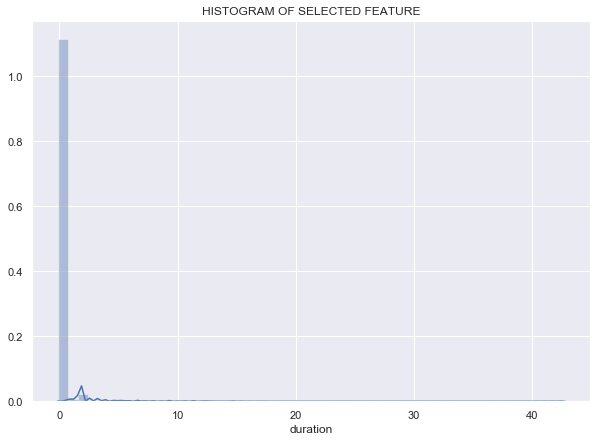

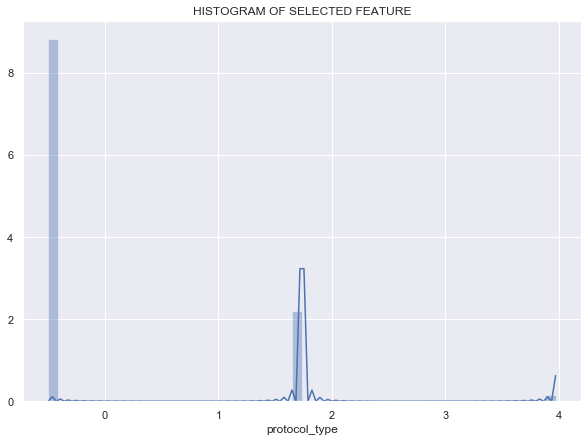

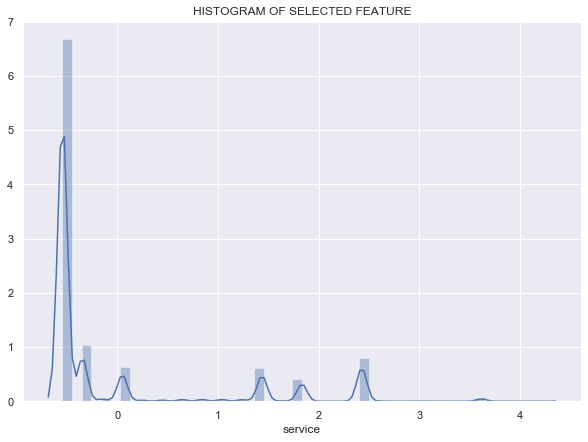

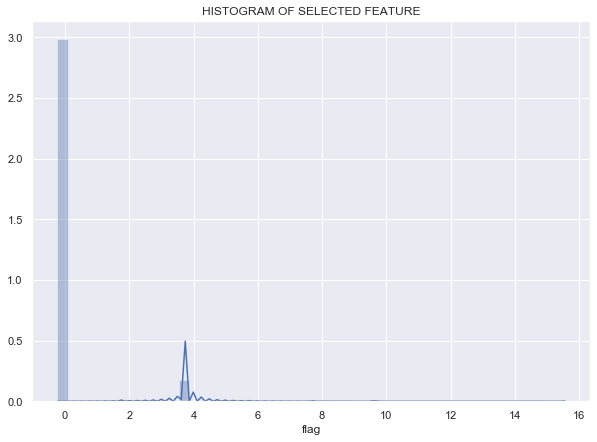

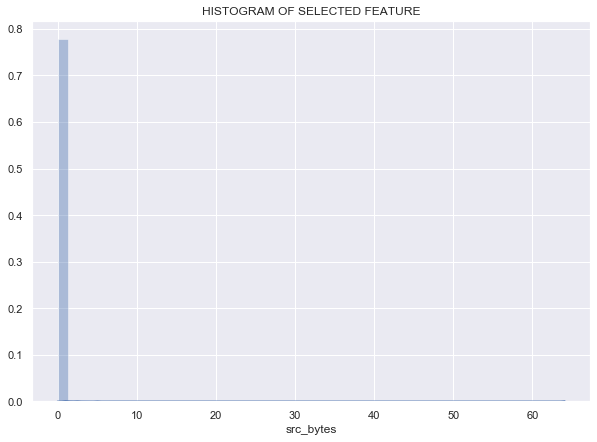

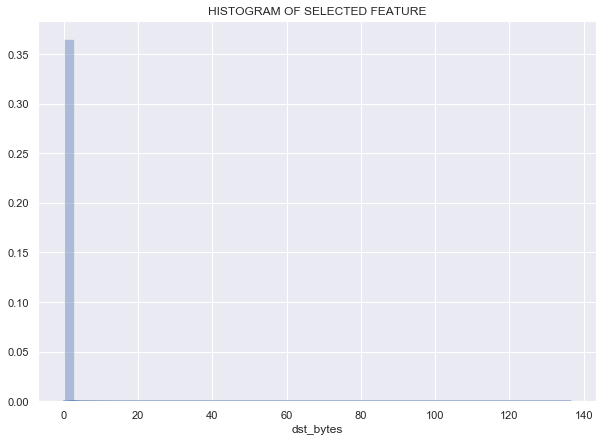

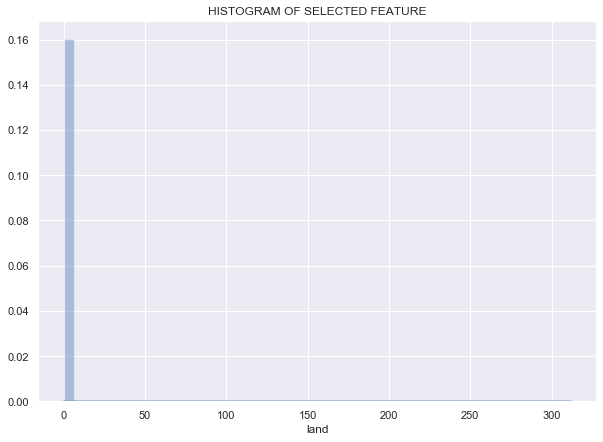

C:\Users\NateDogg\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\NateDogg\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


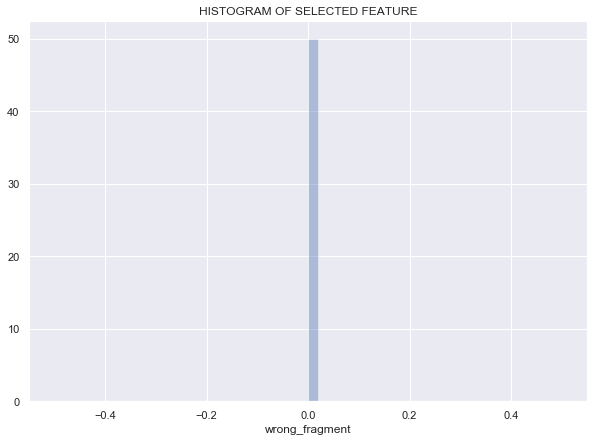

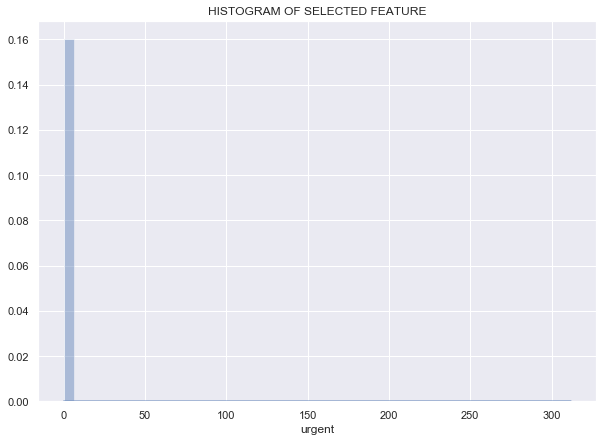

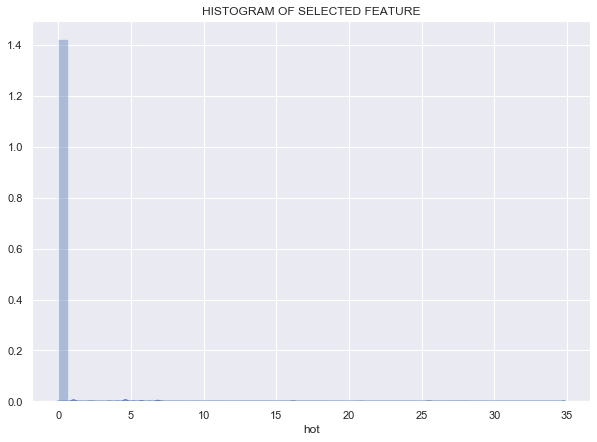

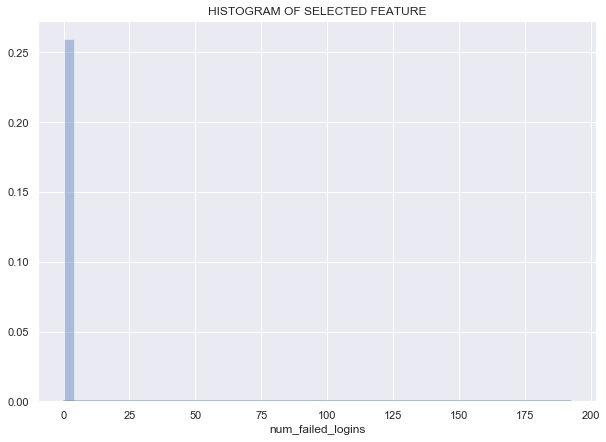

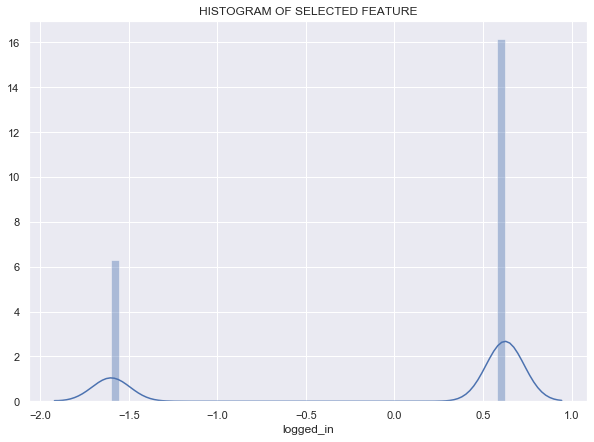

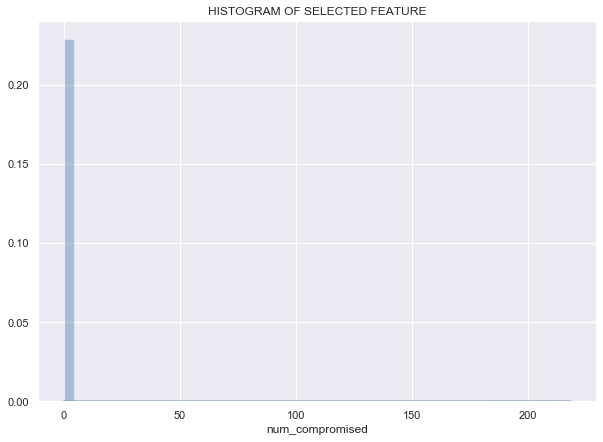

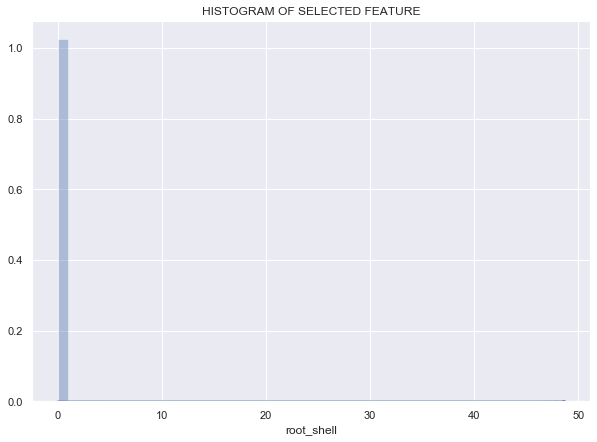

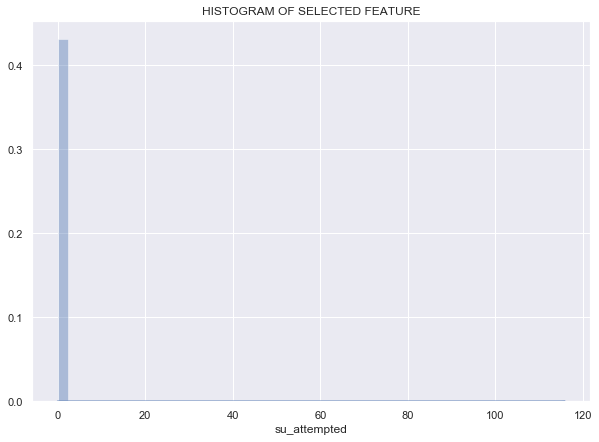

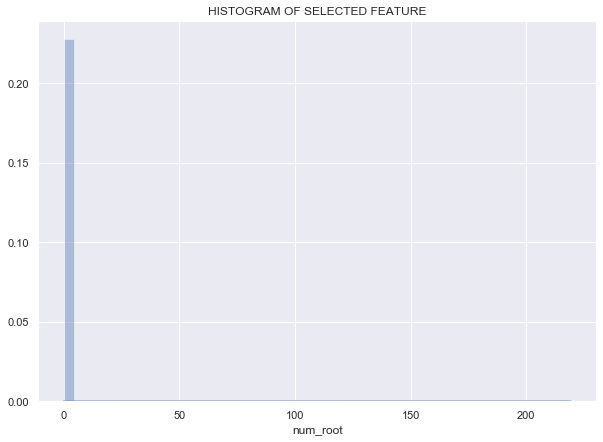

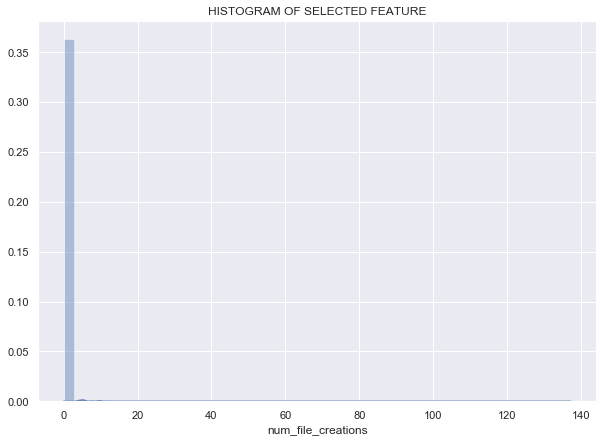

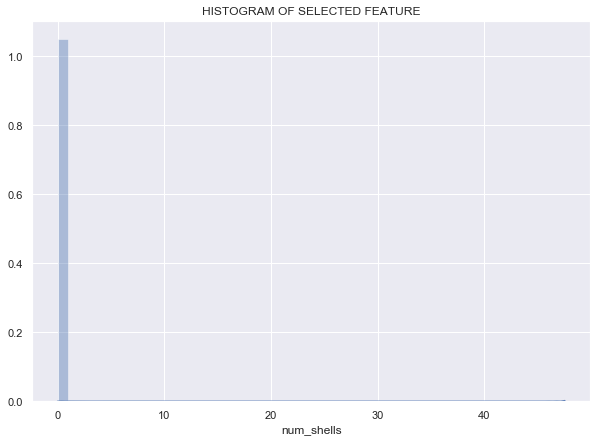

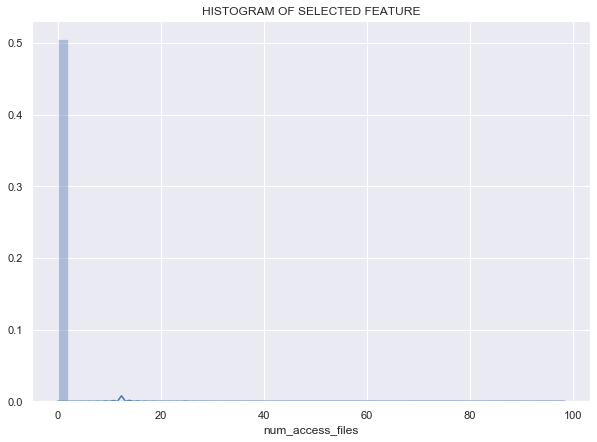

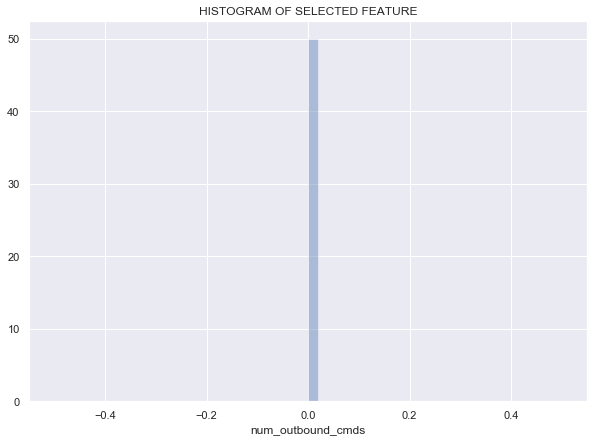

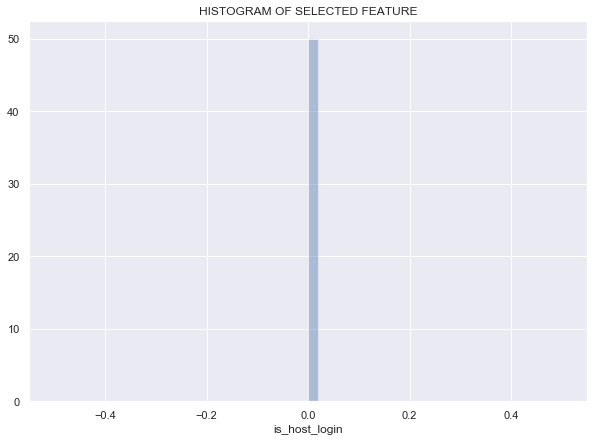

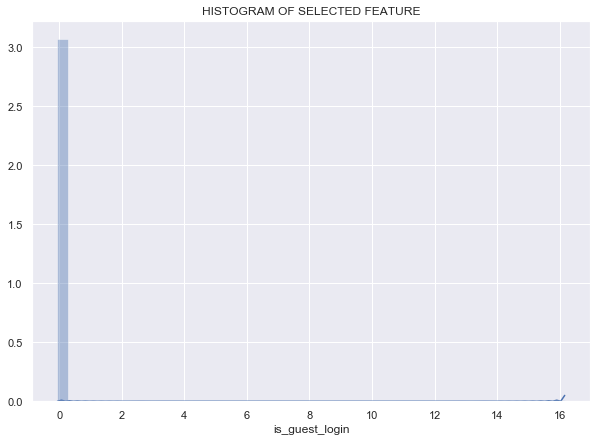

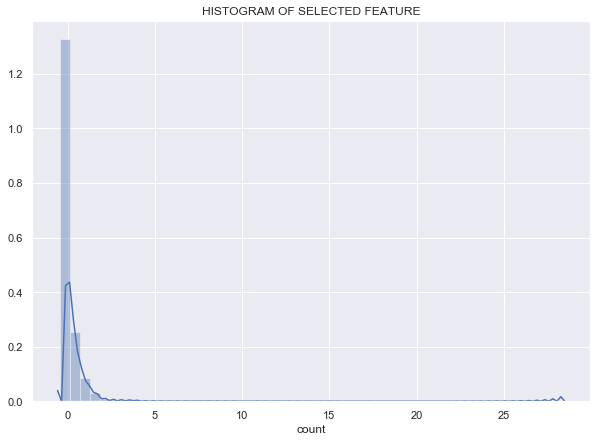

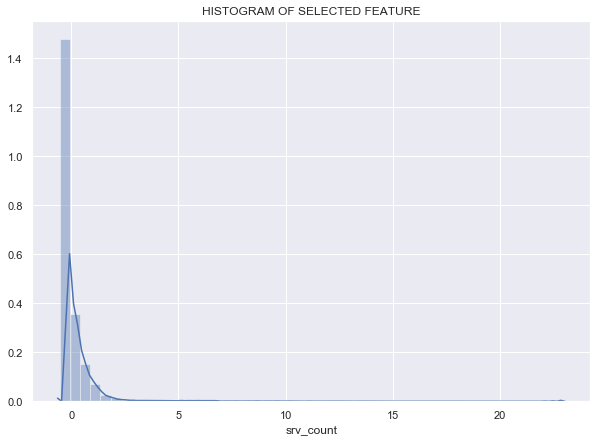

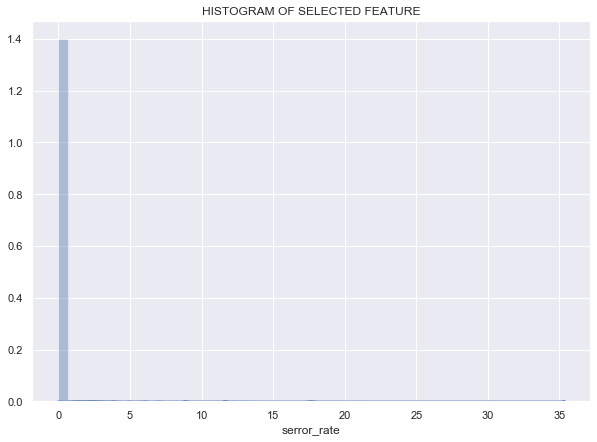

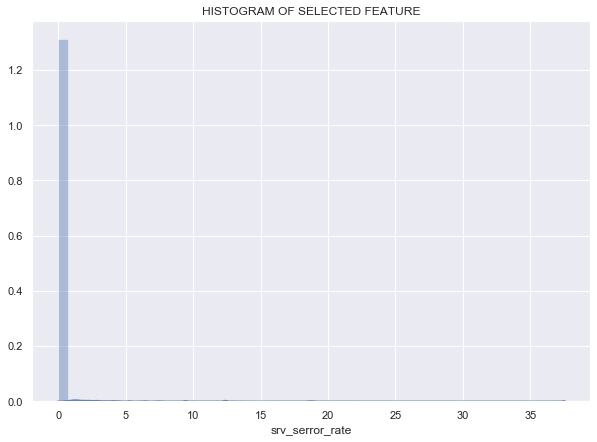

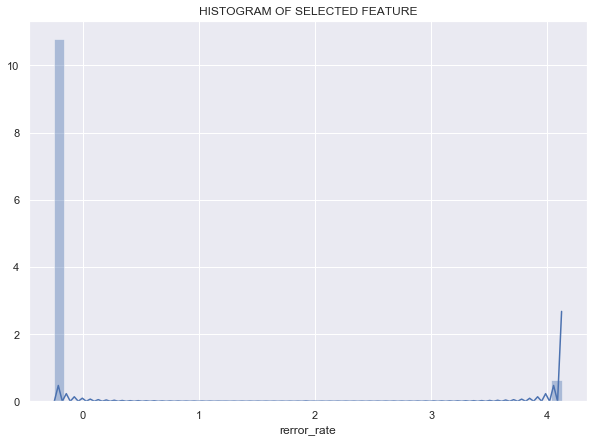

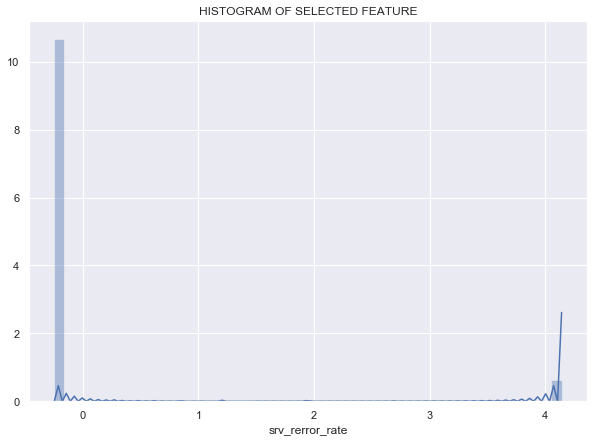

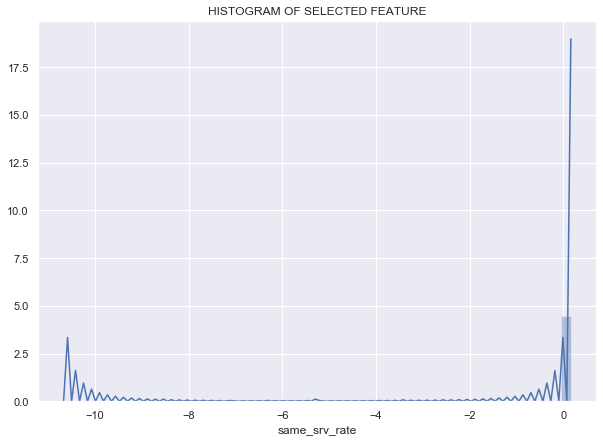

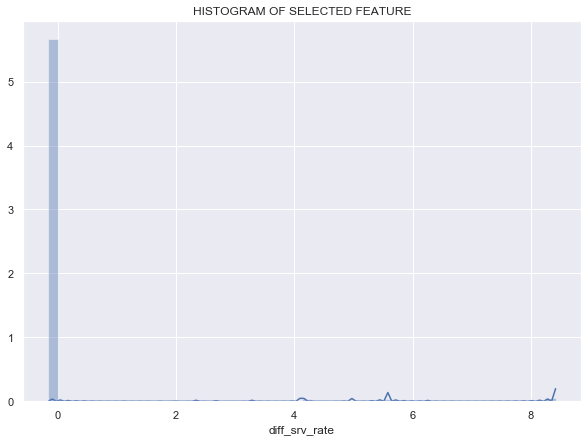

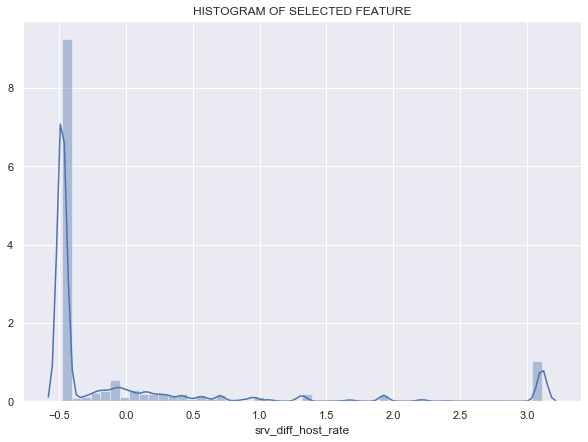

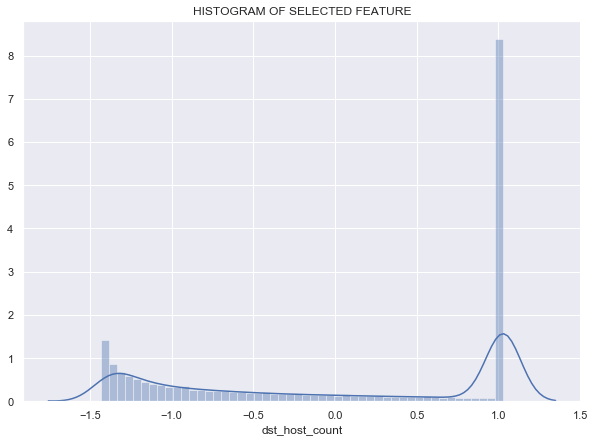

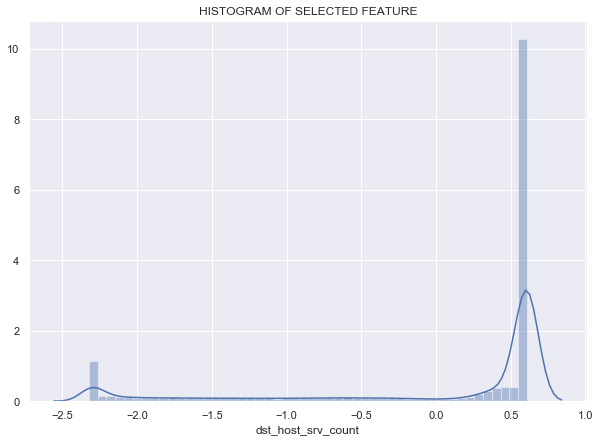

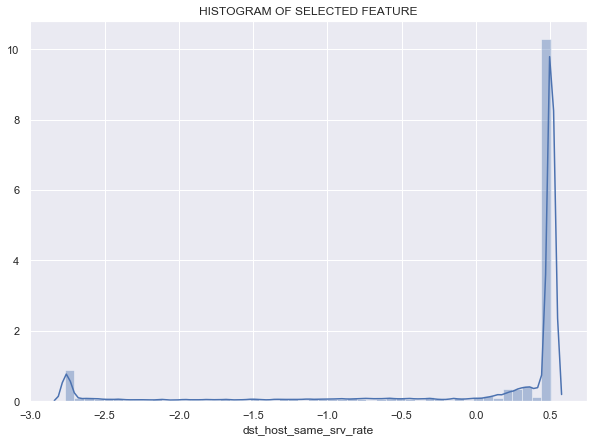

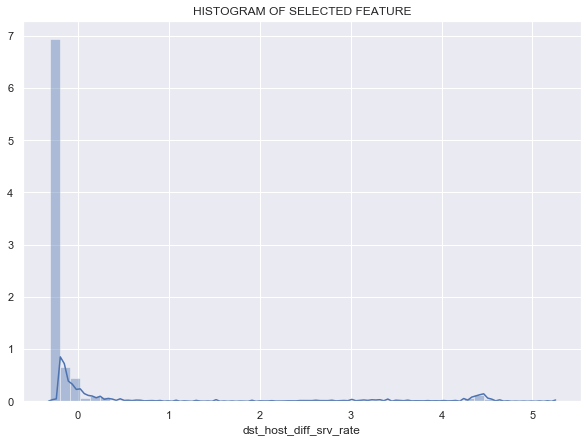

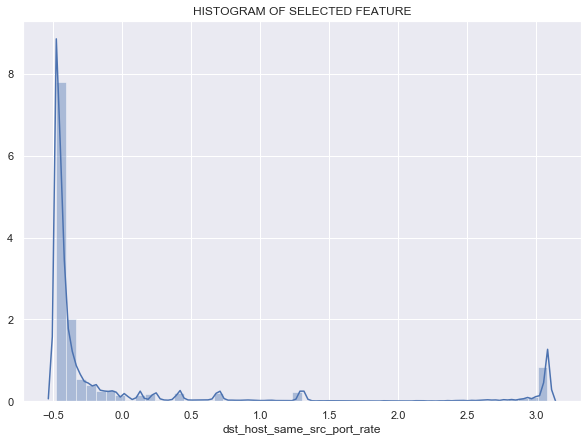

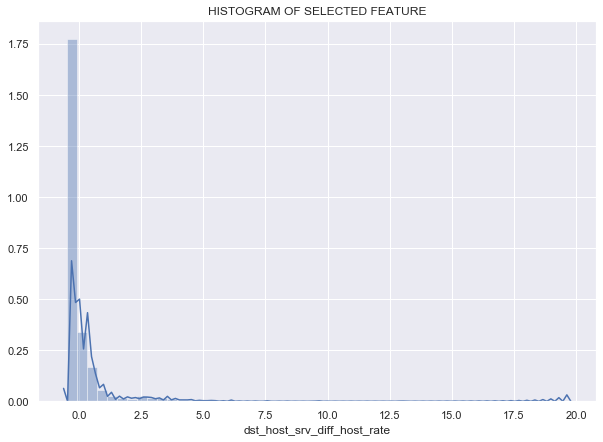

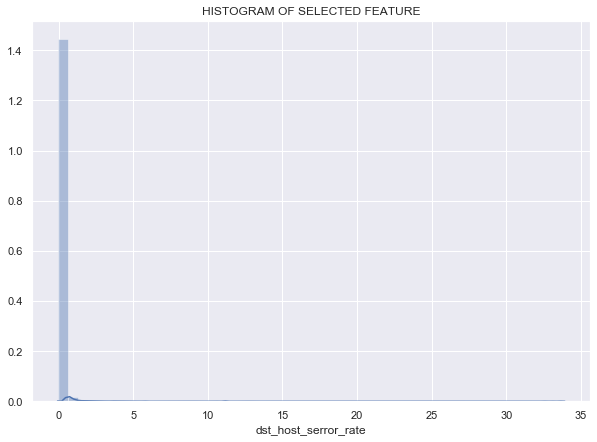

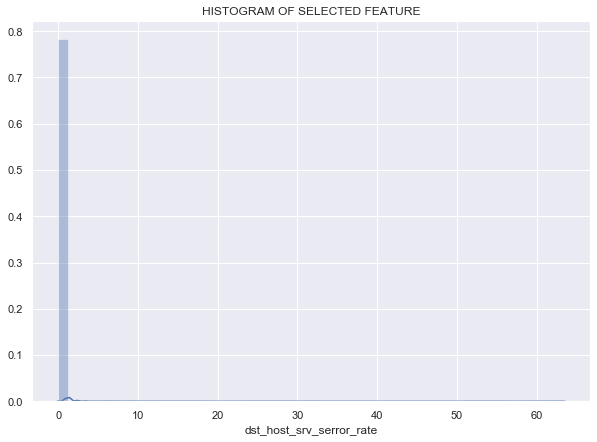

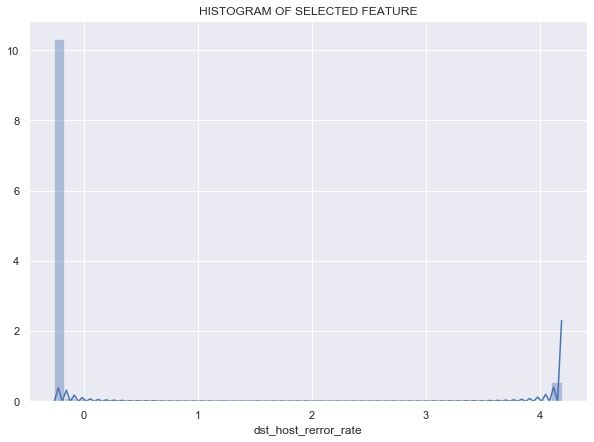

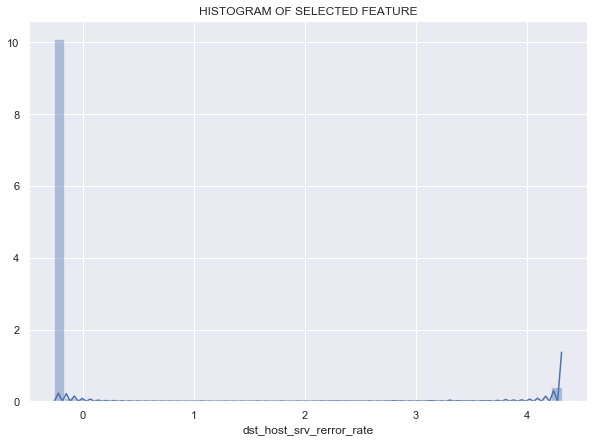

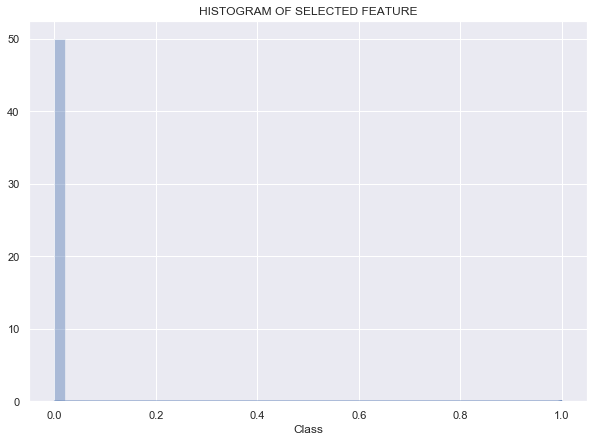

In [17]:
features = features_all
for feature in features:
    hist_plot(traffic_df, feature)

## The Imported Dataset

In [18]:
X = traffic_df.iloc[:,0:len(traffic_df.columns)-1]
X = X.drop(['wrong_fragment', 'num_outbound_cmds', 'is_host_login'], axis=1)   # remove the zero-valued features
X = X.drop(['land', 'urgent', 'root_shell', 'su_attempted'], axis=1)   # remove NaN-valued features resultant from method 'fit_regularized'
y = traffic_df['Class']      # the feature indicating if the action is an intrusion or not

# return the original dataset balance of labeled outcomes
print('Original dataset shape {}'.format(Counter(y)))

Original dataset shape Counter({0: 97278, 1: 30})


In [19]:
# split the dataset for both 'TRAINING' and 'TESTING' outcomes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=random_var)

### Classifier Model  
> - Logistic Regression  
> - L1 Regularization

In [20]:
# establish the logistic regression model
logit_model = sm1.Logit(y_train, X_train)

# http://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.Logit.fit_regularized.html
# use L1 regularization
result = logit_model.fit_regularized(method='l1')

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.6930505499550442
            Iterations: 75
            Function evaluations: 76
            Gradient evaluations: 75


In [21]:
# show the statistical results
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:                  Class   No. Observations:                68115
Model:                          Logit   Df Residuals:                    68081
Method:                           MLE   Df Model:                           33
Date:                Thu, 28 Nov 2019   Pseudo R-squ.:                  -269.5
Time:                        13:25:42   Log-Likelihood:                -47207.
converged:                       True   LL-Null:                       -174.50
Covariance Type:            nonrobust   LLR p-value:                     1.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
duration                       -0.0088      0.010     -0.917      0.359      -0.028       0.010
protocol_type                   0.0161      0.022      0.743      0.458      -0.

### Odds Ratio  
> Identify how the output probabilities change with respect to each of the features.  
> This result tells how a 1 unit increase or decrease in a feature affects the odds of predicting a '1' (intrusion).

In [22]:
# Odds ratio
print(np.exp(result.params))

duration                       0.991221
protocol_type                  1.016182
service                        0.996437
flag                           0.993314
src_bytes                      1.000759
dst_bytes                      0.990750
hot                            1.007872
num_failed_logins              1.016118
logged_in                      1.009676
num_compromised                0.997432
num_root                       1.007854
num_file_creations             1.010189
num_shells                     0.997386
num_access_files               0.993367
is_guest_login                 0.997687
count                          0.996796
srv_count                      1.007681
serror_rate                    1.005022
srv_serror_rate                0.995027
rerror_rate                    1.001138
srv_rerror_rate                1.006349
same_srv_rate                  0.990354
diff_srv_rate                  0.996706
srv_diff_host_rate             1.001980
dst_host_count                 0.996892


### Make Predictions

In [23]:
prediction_frame = X_test.copy()

prediction_frame['probability'] = result.predict(X_test)

prediction_frame['actual'] = y_test

prediction_frame['prediction'] = prediction_frame.apply(prediction_fun, axis=1)

In [24]:
prediction_frame

,duration,protocol_type,service,flag,src_bytes,dst_bytes,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,probability,actual,prediction
21527,-0.159396,-0.499810,-0.546559,-0.235838,-0.027268,-0.076400,-0.052515,-0.008904,0.625084,-0.007165,...,-0.313673,3.081466,-0.083333,-0.072094,-0.067923,-0.256513,-0.255045,0.503950,0,1.0
60641,-0.159396,1.735996,0.048484,-0.235838,-0.032586,-0.088989,-0.052515,-0.008904,-1.599785,-0.007165,...,-0.258118,-0.441716,-0.486043,-0.072094,-0.067923,-0.256513,-0.255045,0.500860,0,1.0
43983,-0.159396,-0.499810,1.833615,-0.235838,-0.004299,-0.090107,-0.052515,-0.008904,0.625084,-0.007165,...,-0.202563,0.483564,-0.486043,-0.072094,-0.067923,-0.256513,-0.255045,0.498411,0,0.0
65946,-0.159396,-0.499810,1.833615,-0.235838,-0.011955,-0.090107,-0.052515,-0.008904,0.625084,-0.007165,...,0.408540,0.341213,0.118022,-0.072094,-0.067923,-0.256513,-0.255045,0.503022,0,1.0
29889,-0.159396,-0.499810,-0.546559,-0.235838,-0.027794,-0.080099,-0.052515,-0.008904,0.625084,-0.007165,...,-0.313673,-0.441716,0.520732,-0.072094,-0.067923,-0.256513,-0.255045,0.498061,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76973,-0.159396,-0.499810,-0.546559,3.711338,-0.033814,-0.090107,-0.052515,-0.008904,-1.599785,-0.007165,...,-0.313673,3.081466,2.534284,-0.072094,-0.067923,4.188683,4.314091,0.516132,0,1.0
95703,-0.159396,-0.499810,-0.546559,-0.235838,-0.023703,-0.078902,-0.052515,-0.008904,0.625084,-0.007165,...,-0.313673,-0.477304,-0.486043,-0.072094,-0.067923,-0.256513,-0.255045,0.498541,0,0.0
60239,-0.159396,-0.499810,-0.546559,-0.235838,-0.027852,-0.081909,-0.052515,-0.008904,0.625084,-0.007165,...,-0.313673,-0.477304,-0.284688,-0.072094,-0.067923,-0.256513,-0.255045,0.498019,0,0.0
47168,-0.159396,-0.499810,-0.546559,-0.235838,-0.024959,0.485708,-0.052515,-0.008904,0.625084,-0.007165,...,-0.313673,-0.370541,-0.284688,-0.072094,-0.067923,-0.256513,-0.255045,0.497564,0,0.0


### Accuracy

In [25]:
TP = np.sum([a == 1.0 and p == 1.0 for a, p in zip(prediction_frame['actual'], prediction_frame['prediction'])])
TN = np.sum([a == 0.0 and p == 0.0 for a, p in zip(prediction_frame['actual'], prediction_frame['prediction'])])

FP = np.sum([a == 0.0 and p == 1.0 for a, p in zip(prediction_frame['actual'], prediction_frame['prediction'])])
FN = np.sum([a == 1.0 and p == 0.0 for a, p in zip(prediction_frame['actual'], prediction_frame['prediction'])])

num_obs = prediction_frame.shape[0]
accuracy = (TP + TN) / num_obs

print('TP: {}, TN: {}'.format(TP, TN))
print('FP: {}, FN: {}'.format(FP, FN))

print('\nTOTAL OBSERVATIONS: {}'.format(num_obs))
print('Accuracy over two classes: {0:.2f}%'.format(accuracy*100.))

TP: 11, TN: 19867
FP: 9315, FN: 0

TOTAL OBSERVATIONS: 29193
Accuracy over two classes: 68.09%


### Confusion Matrix

In [26]:
print('Actual = columns')
print('Predicted = rows')
print('\n  0.0   1.0')
print('----------------')

cutoff = 0.5
confusion = result.pred_table(threshold=cutoff)
TP_conf = confusion[1][1]
TN_conf = confusion[0][0]
FP_conf = confusion[0][1]
FN_conf = confusion[1][0]
total_obs = TP_conf + TN_conf + FP_conf + FN_conf

print(confusion)
print('\nTOTAL OBSERVATIONS: {}'.format(int(total_obs)))
print('Accuracy over two classes: {0:.2f}%'.format(((TP_conf + TN_conf)/total_obs)*100.))

Actual = columns
Predicted = rows

  0.0   1.0
----------------
[[4.7090e+04 2.1006e+04]
 [0.0000e+00 1.9000e+01]]

TOTAL OBSERVATIONS: 68115
Accuracy over two classes: 69.16%


## The Oversampled Dataset

### Oversample

In [27]:
# oversample the dataset to balance it, for improved prediction capability
sm_res = SMOTE(random_state=random_var)
X_sm, y_sm = sm_res.fit_sample(X, y)
print('Resampled dataset shape {}'.format(Counter(y_sm)))

Resampled dataset shape Counter({0: 97278, 1: 97278})


In [28]:
# establish the oversampling results as DataFrames for further calculations
X_res = pd.DataFrame(X_sm, columns=X.columns)
y_res = pd.DataFrame(y_sm)

In [29]:
# split the dataset for both 'TRAINING' and 'TESTING' outcomes
X_res_train, X_res_test, y_res_train, y_res_test = train_test_split(X_res, y_res, test_size=0.30, random_state=random_var)

### Classifier Model  
> - Logistic Regression  
> - L1 Regularization

In [30]:
# establish the logistic regression model
logit_res_model = sm1.Logit(y_res_train, X_res_train)

# http://www.statsmodels.org/stable/generated/statsmodels.discrete.discrete_model.Logit.fit_regularized.html
# use L1 regularization
result_res = logit_res_model.fit_regularized(method='l1')

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.3685966592920063
            Iterations: 159
            Function evaluations: 159
            Gradient evaluations: 159


In [31]:
# show the statistical results
print(result_res.summary())

                           Logit Regression Results                           
Dep. Variable:                      0   No. Observations:               136189
Model:                          Logit   Df Residuals:                   136155
Method:                           MLE   Df Model:                           33
Date:                Thu, 28 Nov 2019   Pseudo R-squ.:                  0.4682
Time:                        13:26:09   Log-Likelihood:                -50199.
converged:                       True   LL-Null:                       -94399.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
duration                       -0.0026      0.010     -0.269      0.788      -0.022       0.017
protocol_type                  -0.2940      0.023    -12.748      0.000      -0.

### Odds Ratio  
> Identify how the output probabilities change with respect to each of the features.  
> This result tells how a 1 unit increase or decrease in a feature affects the odds of predicting a '1' (intrusion).

In [32]:
# Odds ratio
print(np.exp(result_res.params))

duration                       0.997372
protocol_type                  0.745279
service                        1.457732
flag                           0.950191
src_bytes                      0.984307
dst_bytes                      0.993861
hot                            1.576251
num_failed_logins              1.002126
logged_in                      1.119349
num_compromised                4.608626
num_root                       0.217864
num_file_creations             1.165445
num_shells                     0.974306
num_access_files               0.992934
is_guest_login                 0.739361
count                          0.981271
srv_count                      1.068816
serror_rate                    1.102959
srv_serror_rate                0.916506
rerror_rate                    1.018699
srv_rerror_rate                1.019985
same_srv_rate                  1.022056
diff_srv_rate                  1.047408
srv_diff_host_rate             1.005195
dst_host_count                 1.049037


### Make Predictions

In [33]:
prediction_res_frame = X_res_test.copy()

prediction_res_frame['probability'] = result_res.predict(X_res_test)

prediction_res_frame['actual'] = y_res_test

prediction_res_frame['prediction'] = prediction_res_frame.apply(prediction_fun, axis=1)

In [34]:
prediction_res_frame.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,hot,num_failed_logins,logged_in,num_compromised,...,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,probability,actual,prediction
117905,-0.131837,-0.499810,0.772372,-0.235838,0.019837,0.003020,3.778970,-0.008904,0.625084,0.370630,...,-0.313673,3.081466,14.999334,-0.072094,-0.067923,-0.256513,-0.255045,0.990265,1,1.0
23485,-0.159396,-0.499810,-0.546559,-0.235838,-0.027969,0.020798,-0.052515,-0.008904,0.625084,-0.007165,...,-0.313673,-0.263778,0.118022,-0.072094,-0.067923,-0.256513,-0.255045,0.471000,0,0.0
111438,-0.132078,-0.499810,0.445180,-0.235838,0.035715,0.014960,3.438021,-0.008904,0.625084,0.402167,...,-0.313673,0.464691,-0.486043,-0.072094,-0.067923,-0.042619,-0.035187,0.989458,1,1.0
56939,-0.159396,-0.499810,-0.348211,-0.235838,-0.015959,-0.081191,-0.052515,-0.008904,0.625084,-0.007165,...,0.241876,-0.406129,-0.083333,-0.072094,-0.067923,-0.167609,-0.255045,0.579021,0,1.0
92762,-0.159396,1.735996,0.048484,-0.235838,-0.032878,-0.087605,-0.052515,-0.008904,-1.599785,-0.007165,...,-0.258118,-0.441716,-0.486043,-0.072094,-0.067923,-0.256513,-0.255045,0.318491,0,0.0


### Accuracy

In [35]:
TP_res = np.sum([a == 1.0 and p == 1.0 for a, p in zip(prediction_res_frame['actual'], prediction_res_frame['prediction'])])
TN_res = np.sum([a == 0.0 and p == 0.0 for a, p in zip(prediction_res_frame['actual'], prediction_res_frame['prediction'])])

FP_res = np.sum([a == 0.0 and p == 1.0 for a, p in zip(prediction_res_frame['actual'], prediction_res_frame['prediction'])])
FN_res = np.sum([a == 1.0 and p == 0.0 for a, p in zip(prediction_res_frame['actual'], prediction_res_frame['prediction'])])

num_res_obs = prediction_res_frame.shape[0]
accuracy_res = (TP_res + TN_res) / num_res_obs

print('TP: {}, TN: {}'.format(TP_res, TN_res))
print('FP: {}, FN: {}'.format(FP_res, FN_res))

print('\nTOTAL OBSERVATIONS: {}'.format(num_res_obs))
print('Accuracy over two classes: {0:.2f}%'.format(accuracy_res*100.))

TP: 29309, TN: 20713
FP: 8345, FN: 0

TOTAL OBSERVATIONS: 58367
Accuracy over two classes: 85.70%


### Confusion Matrix

In [36]:
print('Actual = columns')
print('Predicted = rows')
print('\n  0.0   1.0')
print('----------------')

confusion_res = result_res.pred_table(threshold=cutoff)
TP_res = confusion_res[1][1]
TN_res = confusion_res[0][0]
FP_res = confusion_res[0][1]
FN_res = confusion_res[1][0]
total_res_obs = TP_res + TN_res + FP_res + FN_res

print(confusion_res)
print('\nTOTAL OBSERVATIONS: {}'.format(int(total_res_obs)))
print('Accuracy over two classes: {0:.2f}%'.format(((TP_res + TN_res)/total_res_obs)*100.))

Actual = columns
Predicted = rows

  0.0   1.0
----------------
[[48804. 19416.]
 [    0. 67969.]]

TOTAL OBSERVATIONS: 136189
Accuracy over two classes: 85.74%


## Conclusion

> ***OVERVIEW***  
> This assignment accomplished 2 primary outcomes with several data handling preparatory steps at first required such as several statistical perspectives and histogram plots of the various dataset features. The imported dataset relfects computer network traffic and is intended for predicting network intrusions as happening or not, a binary classification problem.  
<br>  
Overall, a comparison between an imbalanced categorical dataset and one that is oversampled were both derived. Predictions were achieved using a Logistic Regression classifier model from the StatsModel library where Ridge regularization was executed against  the initially overparameterized dataset of 39 features. 4 features were removed due to entries of either '0' or 'NaN' after computing the summary statistics of the model. These deletions enabled successful computation of the summary and valid data was consequently derived.  
<br>  
***MODEL PERFORMANCE***  
> Model performance is compared using accuracy as shown below:   
- The initially imbalanced  dataset returned  model prediction accuracies of 68.09% and 69.16%.  
- The oversampled dataset resulted in 85.70% and 85.74% accuracies.  
  
> Note that 2 methods were implimented to validate each of the results. The latter is achieved via the StatsModel function `pred_table`, and the prior is a full implimentation of the same with similar, though not identical, results. Between the two methods, the oversampled dataset reflects a significant improvement in prediction capability of the L1 Logistic Regression model.  
<br>  
Another measure of model performance is observed via the R-squared values from each of the models summary statstics. For the imbalanced dataset, -269.05 is resultant, while the balanced dataset returns 0.4682. This is clearly an improved residual value. Yet another metric to evaluate the 2 models, is that of the odds ratio. For the prior model nearly all of the features have a magnitude of 1, whereas for the latter these same features show improved deviance from 1. In this way it conveys a measure of which of the features is more influenctial over the others. For example, we see that feature `num_compromised`, the "number of 'compromised' conditions" with a value of 4.61, is the largest of all odd ratio results for the balanced data. This apparently then, is the most influential feature toward the model's performance. Finally, the values returned upon executing each of the models themselves indicates improved performance according to the `Current function value` of 0.69 and 0.37 for the imbalanced and balanced datasets respectively. Here, a lower value reflects a preferred result.